<StemContainer object of 3 artists>

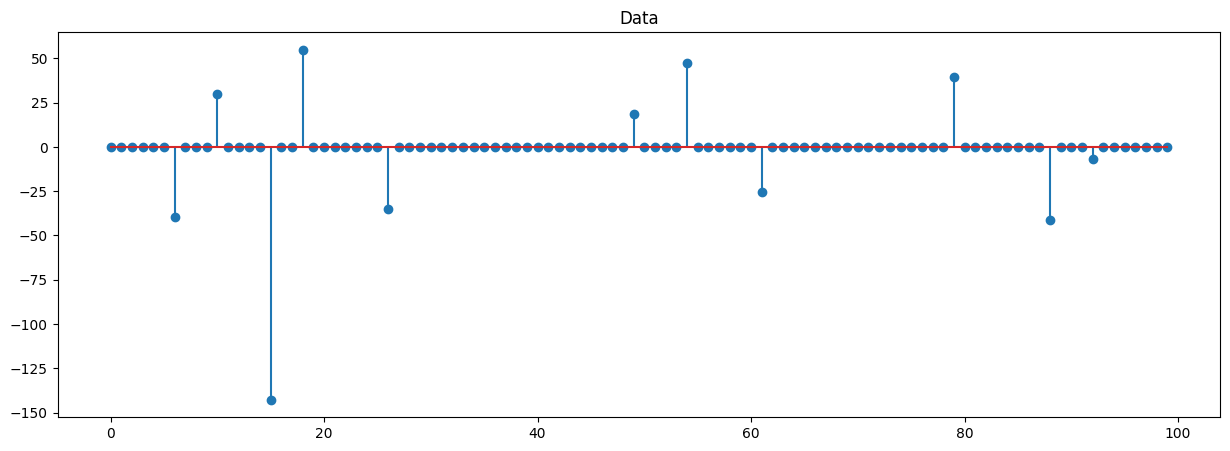

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200722 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


In [3]:
#3. MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler().fit(signal)
scaled_data_max_abs = scaler.transform(signal)
#max abs scaler is done by dividing the data by the maximum absolute value of the data
#scales data to [-1,1]

In [4]:
#3. MinMaxScaler
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

scaled_data_min_max = min_max_scale(signal)
print("min of scaled data", np.min(scaled_data_min_max), "max of scaled data", np.max(scaled_data_min_max))
#min max scaling is done by subtracting the min value and dividing by the difference between max and min values
#this is done to scale the data between 0 and 1

min of scaled data 0.0 max of scaled data 1.0


In [5]:
#3. StandardNormalizer
def StandardNormalizer(data):
    mean = np.mean(data)
    std = np.std(data)
    scaled_data = (data - mean) / std
    return scaled_data

normalized_data_standard = StandardNormalizer(signal)
print("mean of scaled data", np.mean(normalized_data_standard), "std of scaled data", np.std(normalized_data_standard))
#standard normalization is done by subtracting the mean and dividing by the standard deviation
#data set now has a zero mean and a unit variance

#For discussion add what happens when outliers are there and any suggestions to handle them

mean of scaled data -5.5094817597023396e-17 std of scaled data 1.0000000000000004


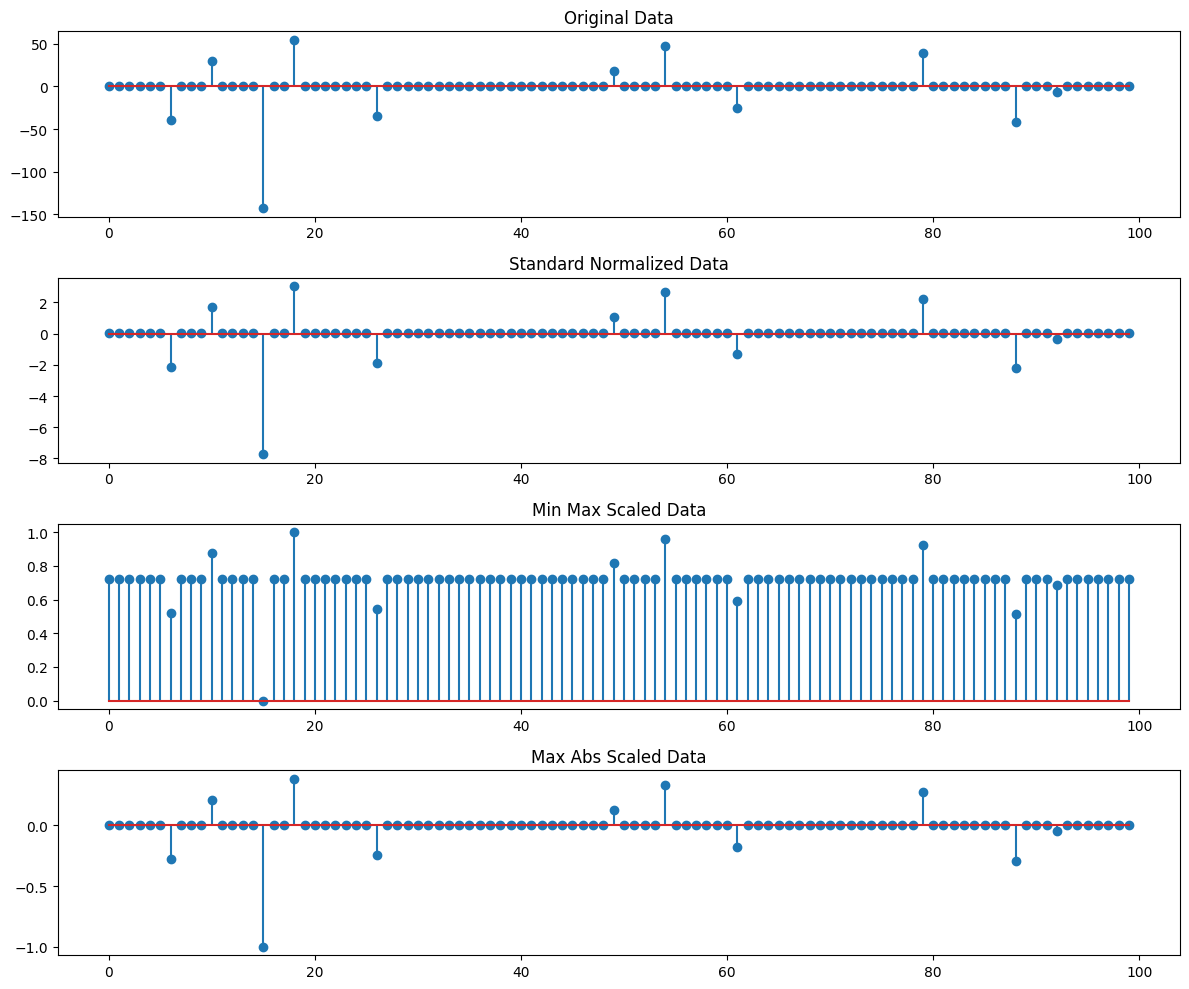

In [6]:
fig, axs = plt.subplots(4, 1, figsize=(12,10))
axs[0].stem(signal)
axs[0].set_title("Original Data")

axs[1].stem(normalized_data_standard)
axs[1].set_title("Standard Normalized Data")

axs[2].stem(scaled_data_min_max)
axs[2].set_title("Min Max Scaled Data")

axs[3].stem(scaled_data_max_abs)
axs[3].set_title("Max Abs Scaled Data")

plt.tight_layout()
plt.show()

In [7]:


#Non zero elements in the signal
non_zero_elements = np.count_nonzero(signal)
print('Number of non zero elements in the signal is', non_zero_elements)

#Non zero elements in the signal after standard normalization
non_zero_elements = np.count_nonzero(normalized_data_standard)
print('Number of non zero elements in the signal after standard normalization is', non_zero_elements)

#Non zero elements in the signal after min max scaling
non_zero_elements = np.count_nonzero(scaled_data_min_max)
print('Number of non zero elements in the signal after min max scaling is', non_zero_elements)

#Non zero elements in the signal after max abs scaling
non_zero_elements = np.count_nonzero(scaled_data_max_abs)
print('Number of non zero elements in the signal after max abs scaling is', non_zero_elements)


Number of non zero elements in the signal is 11
Number of non zero elements in the signal after standard normalization is 100
Number of non zero elements in the signal after min max scaling is 99
Number of non zero elements in the signal after max abs scaling is 11
